<center><h1>Lab 3</h1></center>

<center><h2>Sains Data Genap 2020/2021</h2></center>

<center><h2>Deadline: 14 Maret 2021, 23.55 WIB</h2></center>

### Petunjuk Pengerjaan

1.   Lengkapi data **NPM**, **KOLABORATOR** (jika ada), dan **REFERENSI** (jika ada), pada cell di bawah Petunjuk Umum.
3.   Jalankan kode yang telah disediakan dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan pada bagian yang diberikan tanda "SOAL Y"** sesuai dengan perintah yang diberikan.
4.   Dokumen Jupyter Notebook yang telah dijawab dikumpulkan dengan format penamaan **KodeAsdos_Lab3_NPM_Nama.ipynb**. Contoh: LI_Lab3_1706979341_Lulu Ilmaknun Qurotaini.ipynb
5.    Kumpulkan pada submisi yang telah disediakan di scele sebelum **14 Maret 2021, 23.55 WIB**.

In [ ]:
#Input NPM
NPM = ""

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini (jika ada)
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini (jika ada)
REFERENSI = []

### **Preprocessing pada Titanic Dataset**

Sumber: ToT Microcredential AI-Data Science Dirjen Dikti, dengan beberapa perubahan


# 1. Import library dan data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [ ]:
titanic3 = pd.read_csv('data_titanic3.csv')

In [ ]:
# Mencetak dimensi data
print("data: ", titanic3.shape)

data:  (1309, 14)


In [ ]:
# Membaca kolom-kolom pada DataFrame
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## **VARIABLE DESCRIPTIONS:**

`pclass`:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

`survival`:        Survival
                (0 = No; 1 = Yes)

`name`:           Name

`sex`:             Sex

`age`:             Age

`sibsp`:           Number of Siblings/Spouses Aboard

`parch`:           Number of Parents/Children Aboard

`ticket`:          Ticket Number

`fare`:            Passenger Fare

`cabin`:           Cabin

`embarked`:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

`boat`:            Lifeboat

`body`:            Body Identification Number

`home.dest`:       Home/Destination

**SPECIAL NOTES:**

`pclass` is a proxy for socio-economic status (SES)
 
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [ ]:
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 2. Basic summary statistic

In [ ]:
titanic3.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Dengan method "describe" kita mendapatkan basic statistics untuk atribut numerik. 

Apa yang bisa diamati?
Pada atribut "fare", standard deviasi tampak tinggi, jauh di atas mean, perlu dilihat lebih jauh distribusi datanya.

In [ ]:
# Menampilkan summary dari nonnumeric atribute
display(titanic3.describe(include=np.object))
# "unique" menunjukkan ada berapa variasi nilai dalam suatu atribut. 
# Jika "unique" bernilai 1, atribut tersebut dapat dihapus, karena untuk semua baris nilainya sama"

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [ ]:
# Selanjutnya, akan dibuat plot beberapa kolom untuk melihat distribusi frekuensinya
def countplot(column):
    return sns.countplot(x= column, data= titanic3)

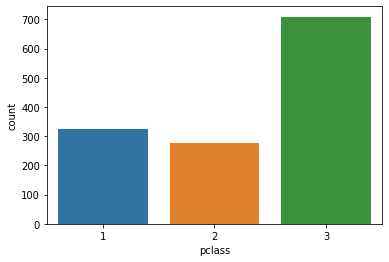

In [ ]:
countplot('pclass')
# Tampak bahwa yang tinggi frekuensinya adalah kelas 3 (lower social economic status)

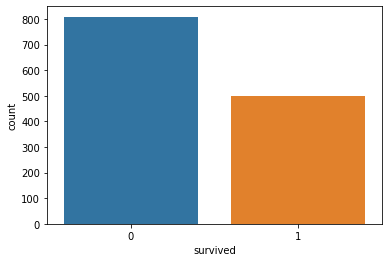

In [ ]:
countplot('survived')
# Tampak bahwa penumpang yang survived lebih sedikit dibanding yang tidak selamat

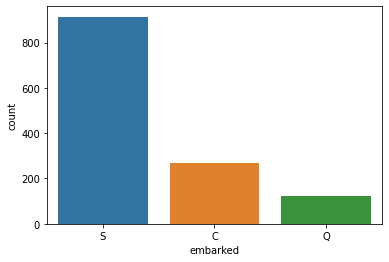

In [ ]:
countplot('embarked')

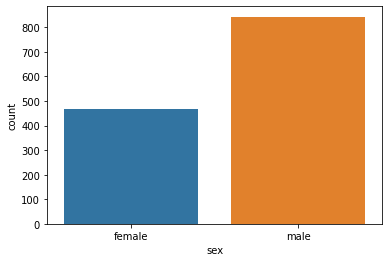

In [ ]:
countplot('sex')

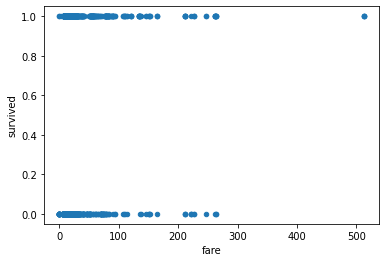

In [ ]:
titanic3.plot.scatter(x="fare", y='survived', figsize=(6,4))
# Dari scatter plot ini tampak ada nilai fare yang sangat besar (outlier) pada penumpang yang survived

In [ ]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
titanic3.corr(method='pearson')


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [ ]:
# Mendapatkan nilai korelasi dari atribut nonnumerik, dengan method "chi2"
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [ ]:
# Korelasi antara survived dengan pclass
compute_freq_chi2(titanic3.survived,titanic3.pclass)
# Penumpang kelas 3 yang tidak survive mencapai 500 orang lebih

Frequency table
pclass      1    2    3
survived               
0         123  158  528
1         200  119  181
ChiSquare test statistic:  127.85915643930328
p-value:  1.7208259588256052e-28


In [ ]:
compute_freq_chi2(titanic3.survived,titanic3.embarked)
# Embarkasi S paling banyak yang tidak survived

Frequency table
embarked    C   Q    S
survived              
0         120  79  610
1         150  44  304
ChiSquare test statistic:  44.2417430714525
p-value:  2.471880987482563e-10


In [ ]:
compute_freq_chi2(titanic3.survived,titanic3.sex)

Frequency table
sex       female  male
survived              
0            127   682
1            339   161
ChiSquare test statistic:  363.6179084388249
p-value:  4.589924936952945e-81


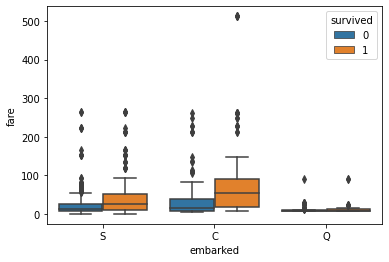

In [ ]:
sns.boxplot(x="embarked", y="fare", hue="survived", data=titanic3);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


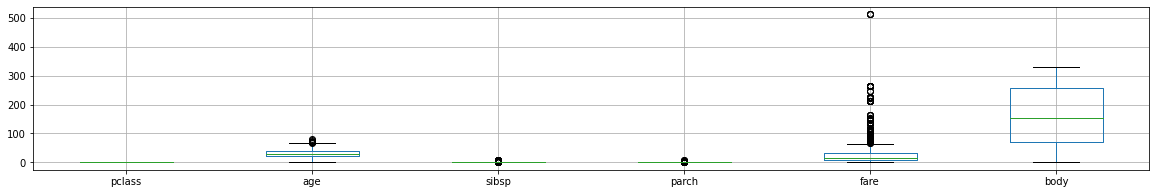

In [ ]:
data2 = titanic3.drop(['survived'],axis=1)
data2.boxplot(figsize=(20,3))

# 3. Data Preprocessing

Preprocessing data dilakukan untuk menyiapkan dataset agar dapat digunakan pada proses klasifikasi. Pada beberapa algoritma klasifikasi, dibutuhkan preprocessing khusus agar algoritma dapat berjalan dengan baik.

**DISCLAIMER!**  Pada contoh ini, preprocessing yang 
dilakukan dimaksudkan untuk algoritma yang memmiliki karakteristik:
* sensitif terhadap outlier
* fitur-fiturnya perlu memiliki range yang setara

## **SOAL 1**

(a) Dari boxplot yang Anda lihat, atribut apa yang mengandung outlier paling banyak?

(b) Buatlah code untuk menampilkan banyaknya outlier pada atribut tersebut!

(c) Apa yang dapat Anda lalukan untuk menangani outlier tersebut? (Impelementasikan dengan code)

In [ ]:
# 1(b) Implementasi code di sini

In [ ]:
# 1(c) Implementasi code di sini

In [ ]:
#Cek duplikasi data

titanic3.duplicated(keep=False).sum()

0

In [ ]:
#Cek missing value

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(titanic3)
# Tampak beberapa atribut memiliki null value yang sangat banyak
# Atribut "body" memiliki null value hingga 90%, "cabin" hingga 77%

           Total   Percent
body        1188  0.907563
cabin       1014  0.774637
boat         823  0.628724
home.dest    564  0.430863
age          263  0.200917
embarked       2  0.001528
fare           1  0.000764


In [ ]:
# Melihat isi cabin (20 baris pertama)
titanic3['cabin'].head(20)

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
9         NaN
10    C62 C64
11    C62 C64
12        B35
13        NaN
14        A23
15        NaN
16    B58 B60
17    B58 B60
18        D15
19         C6
Name: cabin, dtype: object

In [ ]:
# Melihat berapa penumpang yang survive di tiap cabin
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,11.0,11.0
B,18.0,47.0
C,37.0,57.0
D,14.0,32.0
E,11.0,30.0
F,8.0,13.0
G,2.0,3.0
T,1.0,NaN


In [ ]:
# Melihat rerata fare di tiap cabin, untuk kelompok yang survived dan tidak survived
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,34.168182,48.320445
B,76.363422,140.007628
C,111.878832,105.361112
D,46.653264,55.787247
E,46.431436,57.546807
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN


In [ ]:
#drop atribut yang dianggap tidak penting

titanic3_cleaned = titanic3.drop(['name', 'ticket', 'body', 'cabin','home.dest'], axis=1)
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [ ]:
cek_null(titanic3_cleaned)

          Total   Percent
boat        823  0.628724
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [ ]:
# Setelah dihapus atribut yang tidak penting, perlu ditangani atribut yang masih mengandung null value
# Untuk atribut boat, akan null value akan diisi dengan "None"
titanic3_cleaned['boat'] = titanic3_cleaned['boat'].fillna('None')

In [ ]:
#check jumlah yg survived dan tidak jika mempunyai boat atau tidak
(titanic3_cleaned
 .groupby([titanic3_cleaned.boat,'survived'])
 .boat
 .count()
 .unstack())

survived,0,1
boat,,
1,NaN,5.0
10,NaN,29.0
11,NaN,25.0
12,1.0,18.0
13,NaN,39.0
13 15,NaN,2.0
13 15 B,NaN,1.0
14,1.0,32.0
15,NaN,37.0


In [ ]:
cek_null(titanic3_cleaned)

          Total   Percent
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [ ]:
# Untuk atribute "age", null value akan diisi dengan nilai median
col = ["age"]
for c in col:
    median = titanic3_cleaned[~titanic3_cleaned.isna()].median()[0]
    titanic3_cleaned[c] = titanic3_cleaned[c].fillna(median)

In [ ]:
# Untuk atribute "embarked", null value akan diisi dengan nilai 'C'
titanic3_cleaned["embarked"] = titanic3_cleaned["embarked"].fillna('C')

In [ ]:
cek_null(titanic3_cleaned)

      Total   Percent
fare      1  0.000764


In [ ]:
# Tinggal atribute "fare" yang memiliki 1 baris nilai null
titanic3_cleaned[titanic3_cleaned['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
1225,3,0,male,60.5,0,0,NaN,S,None


In [ ]:
# Hapus baris yang atribute "fare" bernilai null
titanic3_cleaned.dropna(inplace=True)

In [ ]:
#jumlah baris berubah dari 1309 menjadi 1308 dan jumlah fitur dari 14 menjadi 9

titanic3_cleaned.shape

(1308, 9)

In [ ]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [ ]:
titanic3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   sex       1308 non-null   object 
 3   age       1308 non-null   float64
 4   sibsp     1308 non-null   int64  
 5   parch     1308 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1308 non-null   object 
 8   boat      1308 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.2+ KB


In [ ]:
#melakukan label encoding, untuk mengubah data kategorikal bertipe string ke numeric value

col = titanic3_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(titanic3_cleaned[c].value_counts()) <= 28:
        le = LabelEncoder() 
        le.fit(list(titanic3_cleaned[c].values)) 
        titanic3_cleaned[c] = le.transform(list(titanic3_cleaned[c].values))

In [ ]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,0,29.00,0,0,211.3375,2,11
1,1,1,1,0.92,1,2,151.5500,2,2
2,1,0,0,2.00,1,2,151.5500,2,27
3,1,0,1,30.00,1,2,151.5500,2,27
4,1,0,0,25.00,1,2,151.5500,2,27


In [ ]:
titanic3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   sex       1308 non-null   int64  
 3   age       1308 non-null   float64
 4   sibsp     1308 non-null   int64  
 5   parch     1308 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1308 non-null   int64  
 8   boat      1308 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 102.2 KB


In [ ]:
# Untuk task klasifikasi, atribut yang menjadi target adalah "survived", sedangkan atribut lainnya menjadi predictor
# Kita akan memisahkan atribut target (Y) dengan atribut predictor (X)

X = titanic3_cleaned.drop('survived', axis=1)
Y = titanic3_cleaned['survived']

In [ ]:
# Dilakukan Normalisasi pada atribut-atribut X 
# Menghasilkan X_scaled, yang merupakan dataset yang sudah "clean" dan siap untuk menjadi input untuk machine learning (klasifikasi)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## **SOAL 2**

(a) Jika akan dilakukan klasifikasi pada data titanic ini, apakah X perlu dinormalisasi?

(b) Bentuk normalisasi apa yang dapat dipilih? Apa alasannya? 

(c) Implementasikan bentuk normalisasi yang Anda pilih!




In [ ]:
# 2(c) Implementasi code di sini